In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
hr_df = pd.read_csv('C:/Users/Rohit Mukherjee/Business_case_studies/datascienceforbusiness-master/hr_data.csv')

In [5]:
hr_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


In [9]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   employee_id            14999 non-null  int64 
 1   number_project         14999 non-null  int64 
 2   average_montly_hours   14999 non-null  int64 
 3   time_spend_company     14999 non-null  int64 
 4   Work_accident          14999 non-null  int64 
 5   left                   14999 non-null  int64 
 6   promotion_last_5years  14999 non-null  int64 
 7   department             14999 non-null  object
 8   salary                 14999 non-null  object
dtypes: int64(7), object(2)
memory usage: 1.0+ MB


In [14]:
hr_df.select_dtypes(exclude = ['int', 'float']).columns

Index(['department', 'salary'], dtype='object')

In [16]:
print(hr_df['department'].unique())
print(hr_df['salary'].unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


In [17]:
hr_df.shape

(14999, 9)

In [18]:
len(hr_df)

14999

In [20]:
len(hr_df.columns)

9

In [21]:
emp_sat_df = pd.read_excel('C:/Users/Rohit Mukherjee/Business_case_studies/datascienceforbusiness-master/employee_satisfaction_evaluation.xlsx')

In [22]:
emp_sat_df.head()

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52


In [25]:
emp_sat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EMPLOYEE #          14999 non-null  int64  
 1   satisfaction_level  14972 non-null  float64
 2   last_evaluation     14972 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 351.7 KB


In [24]:
emp_sat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EMPLOYEE #          14999 non-null  int64  
 1   satisfaction_level  14972 non-null  float64
 2   last_evaluation     14972 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 351.7 KB


In [97]:
df_final = pd.merge(hr_df, emp_sat_df, how = 'inner', left_on = 'employee_id', right_on = 'EMPLOYEE #')

In [98]:
df_final.drop('EMPLOYEE #', axis = 1, inplace = True)

In [99]:
df_final.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [100]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            14999 non-null  int64  
 1   number_project         14999 non-null  int64  
 2   average_montly_hours   14999 non-null  int64  
 3   time_spend_company     14999 non-null  int64  
 4   Work_accident          14999 non-null  int64  
 5   left                   14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   department             14999 non-null  object 
 8   salary                 14999 non-null  object 
 9   satisfaction_level     14972 non-null  float64
 10  last_evaluation        14972 non-null  float64
dtypes: float64(2), int64(7), object(2)
memory usage: 1.4+ MB


In [101]:
df_final.isnull().sum()

employee_id               0
number_project            0
average_montly_hours      0
time_spend_company        0
Work_accident             0
left                      0
promotion_last_5years     0
department                0
salary                    0
satisfaction_level       27
last_evaluation          27
dtype: int64

In [102]:
df_final[df_final.isnull().any(axis = 1)]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
18,3794,2,160,3,1,1,1,sales,low,NaN,NaN
19,1140,5,262,5,0,1,0,sales,low,NaN,0.89
33,1230,2,140,3,0,1,0,hr,low,NaN,NaN
53,1340,2,132,3,0,1,0,support,low,NaN,NaN
72,22316,2,149,3,0,1,0,product_mng,high,NaN,NaN
92,1581,2,143,3,0,1,0,sales,low,NaN,NaN
107,17376,2,148,3,0,1,0,accounting,medium,NaN,NaN
120,1739,4,158,4,1,1,0,technical,low,NaN,NaN
137,1847,2,129,3,0,1,0,management,low,NaN,NaN
175,32923,4,164,2,0,1,0,sales,low,NaN,NaN


In [103]:
df_final.describe()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14972.000000,14972.000000
mean,45424.627575,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.612830,0.716125
std,25915.900127,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.248714,0.171138
min,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.090000,0.360000
25%,22872.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.440000,0.560000
50%,45448.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.640000,0.720000
75%,67480.500000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.820000,0.870000
max,99815.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [104]:
df_final.fillna(df_final.mean(), inplace = True)

C:\Users\ROHITM~1\AppData\Local\Temp/ipykernel_19432/2553340577.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final.fillna(df_final.mean(), inplace = True)


In [105]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            14999 non-null  int64  
 1   number_project         14999 non-null  int64  
 2   average_montly_hours   14999 non-null  int64  
 3   time_spend_company     14999 non-null  int64  
 4   Work_accident          14999 non-null  int64  
 5   left                   14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   department             14999 non-null  object 
 8   salary                 14999 non-null  object 
 9   satisfaction_level     14999 non-null  float64
 10  last_evaluation        14999 non-null  float64
dtypes: float64(2), int64(7), object(2)
memory usage: 1.4+ MB


In [106]:
df_final.drop('employee_id', axis = 1, inplace = True)
df_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,2,157,3,0,1,0,sales,low,0.38,0.53
1,5,262,6,0,1,0,sales,medium,0.80,0.86
2,7,272,4,0,1,0,sales,medium,0.11,0.88
3,5,223,5,0,1,0,sales,low,0.72,0.87
4,2,159,3,0,1,0,sales,low,0.37,0.52


In [107]:
df_final.groupby('department').sum()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,4683,248119,4256,164,273,3,758.17283,879.452250
RandD,3033,158030,2650,134,121,27,487.80000,560.446125
accounting,2934,154292,2702,96,204,14,446.68283,550.706125
hr,2701,146828,2480,89,215,15,442.53566,524.006125
management,2432,126787,2711,103,91,69,391.76566,456.234499
marketing,3164,171073,3063,138,203,43,530.62283,613.946125
product_mng,3434,180369,3135,132,198,0,559.19566,644.662250
sales,15634,831773,14631,587,1014,100,2543.77981,2938.236749
support,8479,447490,7563,345,555,20,1377.90849,1611.534499


In [108]:
df_final.groupby('department').mean()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445,0.617908,0.716750
RandD,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307,0.619822,0.712130
accounting,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253,0.582377,0.718000
hr,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298,0.598830,0.709075
management,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524,0.621850,0.724182
marketing,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117,0.618442,0.715555
product_mng,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000,0.619951,0.714703
sales,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155,0.614440,0.709719
support,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973,0.618173,0.722985


In [109]:
df_final['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [110]:
df_final['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

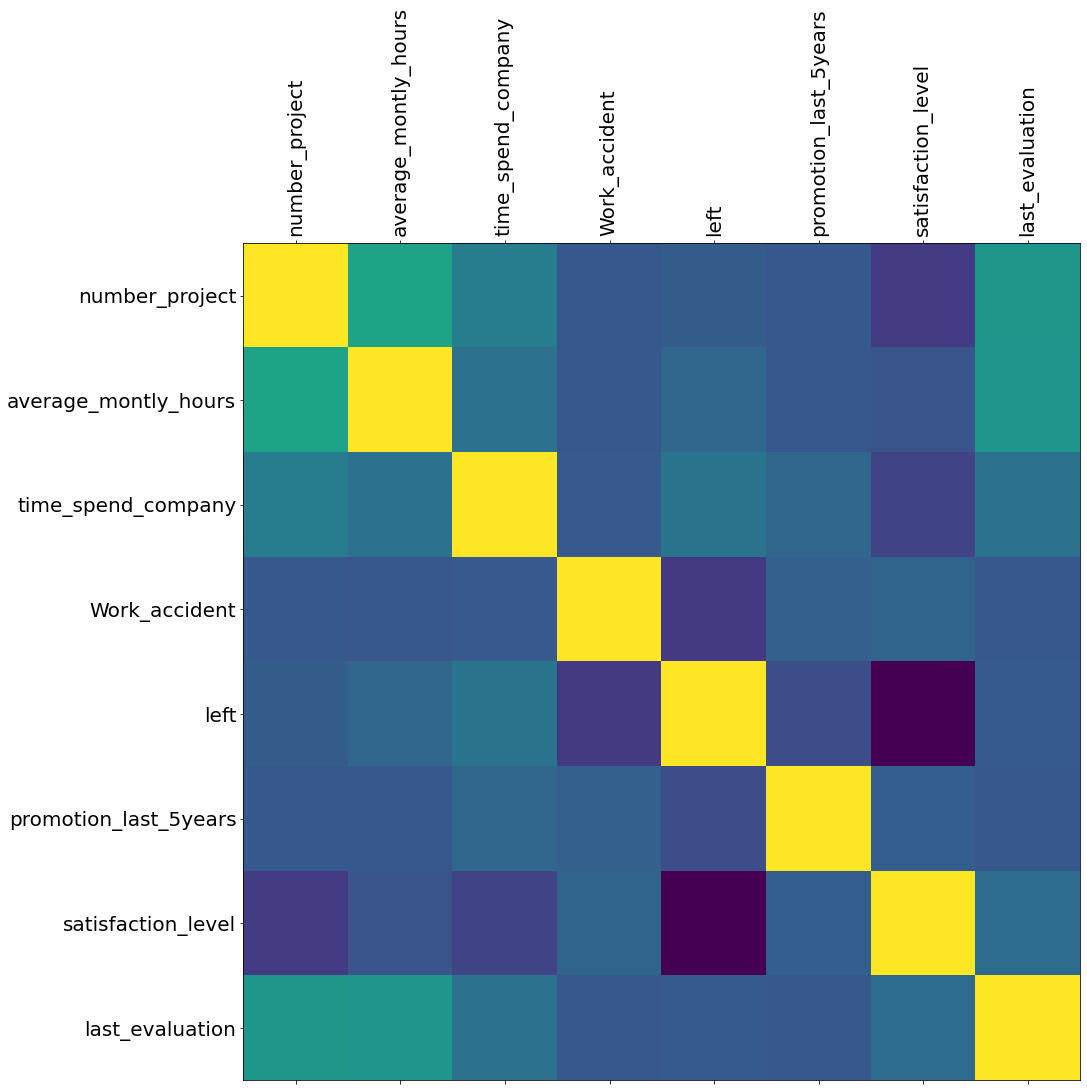

In [111]:
#Correlation
f = plt.figure(figsize = (15,15))
plt.matshow(df_final.corr(), fignum=f.number)
plt.xticks(range(df_final.select_dtypes(['number']).shape[1]), df_final.select_dtypes(['number']).columns, fontsize = 20, rotation = 90)
plt.yticks(range(df_final.select_dtypes(['number']).shape[1]), df_final.select_dtypes(['number']).columns, fontsize = 20)
plt.show()

In [112]:
df_final.select_dtypes(['number']).shape[1]

8

In [113]:
df_final.select_dtypes(['number']).columns

Index(['number_project', 'average_montly_hours', 'time_spend_company',
       'Work_accident', 'left', 'promotion_last_5years', 'satisfaction_level',
       'last_evaluation'],
      dtype='object')

In [114]:
cat_col = [col for col in df_final.columns if df_final[col].dtypes == 'O']
cat_col

['department', 'salary']

In [115]:
cat_df = df_final[cat_col]

In [116]:
cat_df

,department,salary
0,sales,low
1,sales,medium
2,sales,medium
3,sales,low
4,sales,low
...,...,...
14994,support,low
14995,support,low
14996,support,low
14997,support,low


In [117]:
Department = pd.get_dummies(df_final['department'], drop_first=True)
(Department)

,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
14994,0,0,0,0,0,0,0,1,0
14995,0,0,0,0,0,0,0,1,0
14996,0,0,0,0,0,0,0,1,0
14997,0,0,0,0,0,0,0,1,0


In [118]:
Salary = pd.get_dummies(df_final['salary'], drop_first = True)
print(Salary)

       low  medium
0        1       0
1        0       1
2        0       1
3        1       0
4        1       0
...    ...     ...
14994    1       0
14995    1       0
14996    1       0
14997    1       0
14998    1       0

[14999 rows x 2 columns]


In [122]:
main_df = pd.concat([df_final, Department, Salary], axis = 1)

In [123]:
main_df.drop(['department', 'salary'], axis = 1, inplace = True)

In [124]:
main_df.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,low,medium
0,2,157,3,0,1,0,0.38,0.53,0,0,0,0,0,0,1,0,0,1,0
1,5,262,6,0,1,0,0.80,0.86,0,0,0,0,0,0,1,0,0,0,1
2,7,272,4,0,1,0,0.11,0.88,0,0,0,0,0,0,1,0,0,0,1
3,5,223,5,0,1,0,0.72,0.87,0,0,0,0,0,0,1,0,0,1,0
4,2,159,3,0,1,0,0.37,0.52,0,0,0,0,0,0,1,0,0,1,0


In [126]:
len(main_df.columns)

19

In [127]:
main_df.shape

(14999, 19)

In [131]:
main_df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [132]:
from sklearn.model_selection import train_test_split

In [134]:
X = main_df.drop('left', axis = 1)
y = main_df['left']

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [136]:
#Normalise the data
from sklearn.preprocessing import StandardScaler

In [137]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [139]:
df_train = pd.DataFrame(X_train)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.157897,-1.099004,-0.337393,2.417610,-0.149989,-0.772913,-1.434559,-0.236189,-0.22862,-0.228418,-0.207215,-0.246439,-0.251348,1.613476,-0.419693,-0.470396,-0.977175,1.152038
1,0.157897,0.642434,1.724602,-0.413632,-0.149989,1.078485,1.203855,-0.236189,-0.22862,-0.228418,-0.207215,-0.246439,-0.251348,-0.619780,-0.419693,2.125869,1.023358,-0.868027
2,1.781379,0.922666,0.349938,-0.413632,-0.149989,-2.060843,1.497012,-0.236189,-0.22862,-0.228418,4.825917,-0.246439,-0.251348,-0.619780,-0.419693,-0.470396,-0.977175,1.152038
3,0.157897,-0.538541,-1.024725,-0.413632,-0.149989,0.434520,1.262486,-0.236189,-0.22862,-0.228418,-0.207215,-0.246439,-0.251348,1.613476,-0.419693,-0.470396,1.023358,-0.868027
4,0.157897,1.403063,-1.024725,-0.413632,-0.149989,-0.450931,0.089858,-0.236189,-0.22862,4.377943,-0.207215,-0.246439,-0.251348,-0.619780,-0.419693,-0.470396,1.023358,-0.868027


In [208]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

model = LogisticRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print("Accuracy score is: {}".format(accuracy_score(y_test, predictions)*100))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      2262
           1       0.63      0.37      0.47       738

    accuracy                           0.79      3000
   macro avg       0.73      0.65      0.67      3000
weighted avg       0.77      0.79      0.77      3000

[[2101  161]
 [ 462  276]]
Accuracy score is: 79.23333333333333


In [211]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(10, 6)):
    y_pred_proba = clf.predict_proba(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_pred_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

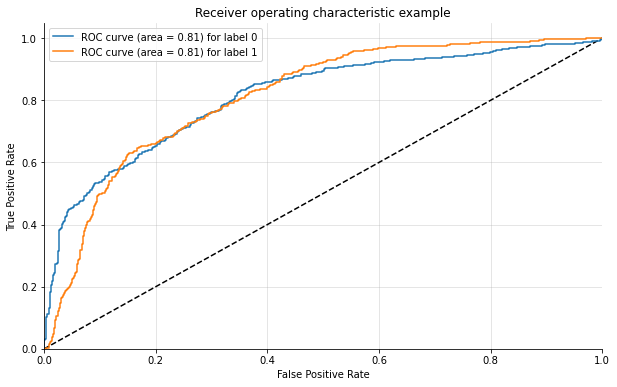

In [212]:
from sklearn.metrics import roc_curve, auc

plot_multiclass_roc(model, X_test, y_test, n_classes=2, figsize=(10, 6))

In [194]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print("Accuracy score is: {}".format(accuracy_score(y_test, predictions)*100))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2262
           1       1.00      0.97      0.98       738

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.99      3000
weighted avg       0.99      0.99      0.99      3000

[[2260    2]
 [  23  715]]
Accuracy score is: 99.16666666666667


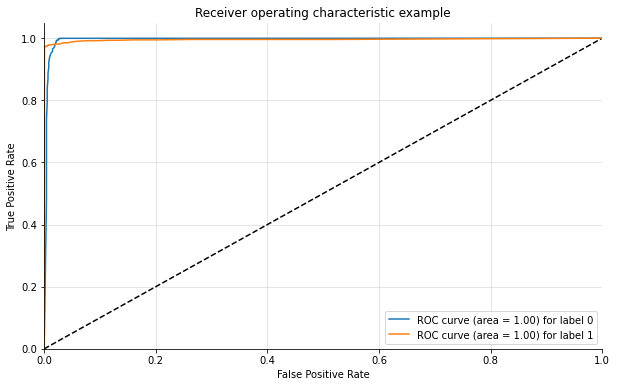

In [195]:
plot_multiclass_roc(model, X_test, y_test, n_classes=2, figsize=(10, 6))

In [176]:
feat_imp = pd.DataFrame(data = model.feature_importances_, index = X.columns, columns = ['Importance'])
feat_imp.sort_values('Importance', ascending = False)

,Importance
satisfaction_level,0.317056
number_project,0.186188
time_spend_company,0.178216
average_montly_hours,0.159917
last_evaluation,0.117534
Work_accident,0.008094
low,0.007372
technical,0.003941
medium,0.003803
sales,0.003577


In [148]:
import tensorflow as tf

In [149]:
print(tf.__version__)

2.5.0


In [151]:
import tensorflow.keras

In [153]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [216]:
model = Sequential()

model.add(Dense(9, activation='relu', input_dim = 18))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [217]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 9)                 171       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 10        
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [218]:
#Start our training
batch_size = 10
epoch = 10

history = model.fit(X_train,
                     y_train,
                     batch_size=batch_size,
                     epochs=epoch,
                     verbose = 1,
                     validation_split=0.1)

score = model.evaluate(X_test, y_test, verbose = 0)
print("Test loss: {}".format(score[0]))
print("Test accuracy {}".format(score[1]))

Epoch 1/10
1080/1080 [==============================] - 5s 3ms/step - loss: 0.3967 - accuracy: 0.8372 - val_loss: 0.2781 - val_accuracy: 0.9058
Epoch 2/10
1080/1080 [==============================] - 3s 2ms/step - loss: 0.2368 - accuracy: 0.9246 - val_loss: 0.2025 - val_accuracy: 0.9333
Epoch 3/10
1080/1080 [==============================] - 2s 2ms/step - loss: 0.1933 - accuracy: 0.9417 - val_loss: 0.1803 - val_accuracy: 0.9425
Epoch 4/10
1080/1080 [==============================] - 2s 2ms/step - loss: 0.1787 - accuracy: 0.9453 - val_loss: 0.1690 - val_accuracy: 0.9475
Epoch 5/10
1080/1080 [==============================] - 2s 2ms/step - loss: 0.1726 - accuracy: 0.9488 - val_loss: 0.1637 - val_accuracy: 0.9450
Epoch 6/10
1080/1080 [==============================] - 2s 2ms/step - loss: 0.1688 - accuracy: 0.9496 - val_loss: 0.1584 - val_accuracy: 0.9458
Epoch 7/10
1080/1080 [==============================] - 3s 2ms/step - loss: 0.1662 - accuracy: 0.9493 - val_loss: 0.1566 - val_accuracy:

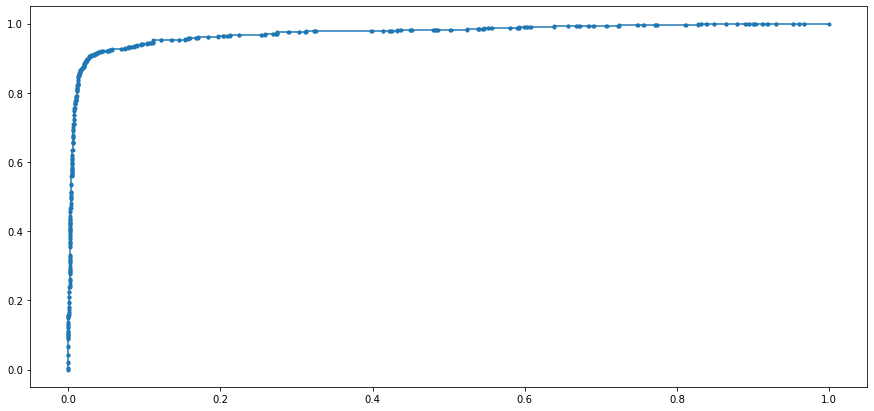

In [219]:
predictions = model.predict(X_test).ravel()

nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_test, predictions)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
plt.figure(figsize = (15,7))
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras)

In [220]:
predictions

array([9.7289303e-05, 1.2284815e-03, 1.6671419e-04, ..., 9.5935762e-03,
       8.5692096e-01, 1.1261404e-03], dtype=float32)

In [199]:
predictions = model.predict(X_test)
predictions = (predictions>0.5)

print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2262
           1       0.90      0.90      0.90       738

    accuracy                           0.95      3000
   macro avg       0.93      0.93      0.93      3000
weighted avg       0.95      0.95      0.95      3000

[[2189   73]
 [  77  661]]


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


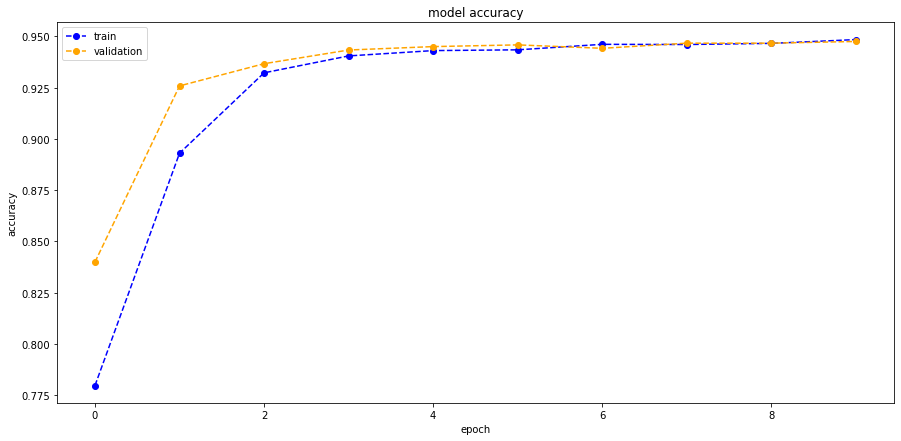

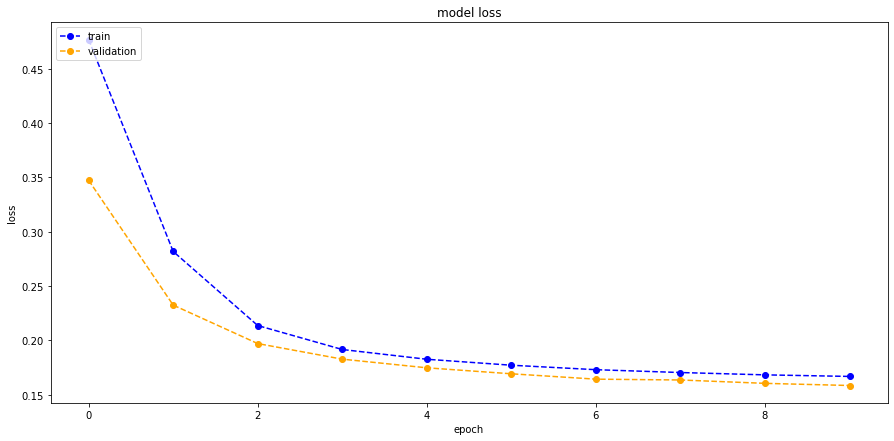

In [187]:
print(history.history.keys())
#  "Accuracy"
plt.figure(figsize = (15,7))
plt.plot(history.history['accuracy'], color='blue', marker='o', linestyle='dashed')
plt.plot(history.history['val_accuracy'], color='orange', marker='o', linestyle='dashed')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.figure(figsize = (15,7))
plt.plot(history.history['loss'], color='blue', marker='o', linestyle='dashed')
plt.plot(history.history['val_loss'], color='orange', marker='o', linestyle='dashed')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()